##### Арцишевский Антон, дз 4.1 

In [11]:
import sqlite3
import random
random.seed = 23
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Создаю таблицы в dbrowser:
таблица informants c колонками Informant_Id, Name, Age, Gender
таблица Answers c колонками Informant_Id, answer_1 - answer_5, reaction_1 - reaction_5
Эти две таблицы связаны по Informant_Id с помощью foreigh_key

Подключу бд и создам курсор

In [12]:
con = sqlite3.connect('123.db')
c = con.cursor()

Создам кортежи с данными для таблицы про информантов

In [13]:
name = ("Вася", "Петя", "Катя", "Саша", "Маша", "Коля", "Костя",
          "Антон", "Олег", "Ахмед", "Султан", "Вова", "Вера", "Аня",
          "Гера", "Галя", "Маня", "Серафима", "Ваня", "Карабас",
         "Наташа", "Сережа")

surname = ("Коробкина", "Путин", "Медведев", "Навальный", "Чайка", "Шевчук",
          "Орлов", "Собянин", "Лужков", "Мединский", "Шайгу", "Обэма",
          "Явлинский", "Янукович", "Зеленский")

genders = ("муж", "жен")

Создам датафрейм на основе полученных данных

In [14]:
dictionary = {'Informant_Id': [], 'Name': [], 'Age': [], 'Gender': []}
for i in range(100):
    name_insert = random.choice(name) + ' ' + random.choice(surname)
    gender = random.choice(genders)
    age = random.randint(18, 69)
    dictionary['Informant_Id'] = dictionary['Informant_Id'] + [i]
    dictionary['Name'] = dictionary['Name'] + [name_insert]
    dictionary['Age'] = dictionary['Age'] + [age]
    dictionary['Gender'] = dictionary['Gender'] + [gender]
df = pd.DataFrame(dictionary)
df

,Informant_Id,Name,Age,Gender
0,0,Маня Путин,64,муж
1,1,Олег Коробкина,30,муж
2,2,Олег Зеленский,38,муж
3,3,Аня Мединский,38,жен
4,4,Саша Чайка,68,жен
...,...,...,...,...
95,95,Серафима Мединский,33,жен
96,96,Карабас Собянин,22,муж
97,97,Ахмед Чайка,67,муж
98,98,Султан Медведев,33,муж


Закину данные датафрейма в бд

In [15]:
df.to_sql(name='informants', con=con, if_exists='replace', index=False)
con.commit()

Создам данные для таблицы с ответами и создам датафрейм

In [16]:
dictionary_1 = {'Informant_Id': [], 'answer_1': [], 'answer_2': [], 'answer_3': [], 'answer_4': [],  'answer_5': [],
             'reaction_1': [], 'reaction_2': [], 'reaction_3': [], 'reaction_4': [], 'reaction_5': []}
for i in range(100):
    Informant_Id = i
    answer_1 = random.randint(1, 5)
    answer_2 = random.randint(1, 5)
    answer_3 = random.randint(1, 5)
    answer_4 = random.randint(1, 5)
    answer_5 = random.randint(1, 5)
    reaction_1 = random.randint(1, 30)
    reaction_2 = random.randint(1, 30)
    reaction_3 = random.randint(1, 30)
    reaction_4 = random.randint(1, 30)
    reaction_5 = random.randint(1, 30)
    dictionary_1['Informant_Id'] = dictionary_1['Informant_Id'] + [Informant_Id]
    dictionary_1['answer_1'] = dictionary_1['answer_1'] + [answer_1]
    dictionary_1['answer_2'] = dictionary_1['answer_2'] + [answer_2]
    dictionary_1['answer_3'] = dictionary_1['answer_3'] + [answer_3]
    dictionary_1['answer_4'] = dictionary_1['answer_4'] + [answer_4]
    dictionary_1['answer_5'] = dictionary_1['answer_5'] + [answer_5]
    dictionary_1['reaction_1'] = dictionary_1['reaction_1'] + [reaction_1]
    dictionary_1['reaction_2'] = dictionary_1['reaction_2'] + [reaction_2]
    dictionary_1['reaction_3'] = dictionary_1['reaction_3'] + [reaction_3]
    dictionary_1['reaction_4'] = dictionary_1['reaction_4'] + [reaction_4]
    dictionary_1['reaction_5'] = dictionary_1['reaction_5'] + [reaction_5]
df_1 = pd.DataFrame(dictionary_1)
df_1

,Informant_Id,answer_1,answer_2,answer_3,answer_4,answer_5,reaction_1,reaction_2,reaction_3,reaction_4,reaction_5
0,0,3,5,3,5,4,15,25,12,29,20
1,1,5,5,5,4,5,6,23,29,27,25
2,2,3,1,3,3,4,7,14,21,23,19
3,3,3,1,1,3,3,25,15,5,10,16
4,4,2,2,5,5,1,17,18,2,7,18
...,...,...,...,...,...,...,...,...,...,...,...
95,95,2,3,2,3,4,20,21,1,3,3
96,96,1,5,1,3,4,11,19,29,8,23
97,97,4,2,4,4,3,23,18,7,9,3
98,98,3,2,2,3,2,29,7,13,20,7


Закину данные датафрейма в бд

In [17]:
df_1.to_sql(name='Answers', con=con, if_exists='replace', index=False)
con.commit()

Я в дб добавлял foreign key для связи таблиц. Однако при перезапуске кода эти данные стирались и приходилось заново вводить ключ. Я не знаю, как это пофиксить (точнее наверное это исправиться, если создать таблицы в питоне и прописать внешний ключ там, но при создании таблиц в sqlite (что требовалось по заданию) это вроде как нельзя сделать), да и никто не знает.

#### Задание: Cоставьте запрос SELECT с условием к одной таблице. Например, сколько ответов, где испытуемые оценили предложение > 4 по шкале

In [31]:
c.execute('SELECT answer_1 FROM Answers WHERE answer_1 > 4')
print(len(c.fetchall()), "испытуемых оценили предложение на 4 или выше")

20 испытуемых оценили предложение на 4 или выше


#### Задание: Cоставьте запрос SELECT к нескольким таблицам, чтобы информация объединялась. Например, сравните, как оценили пример мужчины и женщины (тут нужно использовать JOIN, GROUP BY и avg для среднего)

Простой запрос (не по заданию, я его в самом начале случайно сделал), который связывает имя из таблицы informants и первый ответ информанта из таблицы Answers

In [19]:
c.execute('SELECT Name, Gender, answer_1 FROM Answers JOIN informants ON informants.Informant_id = Answers.Informant_Id WHERE Gender = "муж"')
print(c.fetchall())

[('Маня Путин', 'муж', 3), ('Олег Коробкина', 'муж', 5), ('Олег Зеленский', 'муж', 3), ('Серафима Шайгу', 'муж', 3), ('Маша Орлов', 'муж', 4), ('Вера Обэма', 'муж', 5), ('Серафима Орлов', 'муж', 4), ('Костя Явлинский', 'муж', 5), ('Сережа Коробкина', 'муж', 4), ('Аня Шайгу', 'муж', 4), ('Петя Навальный', 'муж', 3), ('Антон Орлов', 'муж', 1), ('Сережа Янукович', 'муж', 5), ('Серафима Зеленский', 'муж', 3), ('Сережа Собянин', 'муж', 4), ('Маша Шайгу', 'муж', 2), ('Аня Явлинский', 'муж', 4), ('Ахмед Обэма', 'муж', 1), ('Маня Чайка', 'муж', 1), ('Сережа Лужков', 'муж', 3), ('Петя Собянин', 'муж', 5), ('Маша Явлинский', 'муж', 3), ('Сережа Орлов', 'муж', 3), ('Карабас Коробкина', 'муж', 3), ('Костя Шевчук', 'муж', 4), ('Серафима Мединский', 'муж', 1), ('Сережа Чайка', 'муж', 2), ('Костя Обэма', 'муж', 1), ('Галя Зеленский', 'муж', 4), ('Маша Шевчук', 'муж', 3), ('Гера Шайгу', 'муж', 1), ('Ваня Янукович', 'муж', 1), ('Вера Обэма', 'муж', 2), ('Наташа Навальный', 'муж', 1), ('Наташа Шевчук', 

Запрос по заданию

In [20]:
c.execute('SELECT AVG(answer_1), Gender FROM informants JOIN Answers ON informants.Informant_id = Answers.Informant_Id GROUP BY Gender')
print(c.fetchall())

[(3.0545454545454547, 'жен'), (3.066666666666667, 'муж')]


#### Задание: Попробуйте изменить какую-то строку в базе (UPDATE)
За свободу слова!

In [21]:
c.execute('UPDATE informants SET Gender = "тёлка" WHERE Gender = "жен"')
con.commit()

#### Задание: Достаньте время реакции по одному из вопросов отдельно для мужчин, отдельно для женщин и постройте боксплот для двух групп
Достаю время реакции у мужчин

In [22]:
c.execute('SELECT Gender, reaction_1 FROM Answers JOIN informants ON informants.Informant_id = Answers.Informant_Id WHERE Gender = "муж"')
man_reaction = c.fetchall()

Достаю время реакции у женщин

In [23]:
c.execute('SELECT Gender, reaction_1 FROM Answers JOIN informants ON informants.Informant_id = Answers.Informant_Id WHERE Gender = "тёлка"')
woman_reaction = c.fetchall()

Сделаю словарь с полами и временем их реакций, а потом преобразую это в датафрейм

In [24]:
g_reaction = {'Gender': [], 'Reaction': []}
for i in man_reaction:
    g_reaction['Gender'] = g_reaction['Gender'] + [i[0]]
    g_reaction['Reaction'] = g_reaction['Reaction'] + [i[1]]
for i in woman_reaction:
    g_reaction['Gender'] = g_reaction['Gender'] + [i[0]]
    g_reaction['Reaction'] = g_reaction['Reaction'] + [i[1]]
print(g_reaction)

{'Gender': ['муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'муж', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка', 'тёлка'], 'Reaction': [15, 6, 7, 9, 11, 17, 4, 9, 15, 20, 14, 23, 3, 22, 20, 16, 13, 28, 27, 26, 18, 30, 11, 29, 18, 22, 25, 7, 28, 17, 3, 6, 14, 3, 12, 22, 17, 13, 25, 25, 8, 2, 11, 23, 

In [25]:
df_g = pd.DataFrame(g_reaction)
df_g

,Gender,Reaction
0,муж,15
1,муж,6
2,муж,7
3,муж,9
4,муж,11
...,...,...
95,тёлка,12
96,тёлка,1
97,тёлка,30
98,тёлка,20


И, наконец, красивенький боксплот

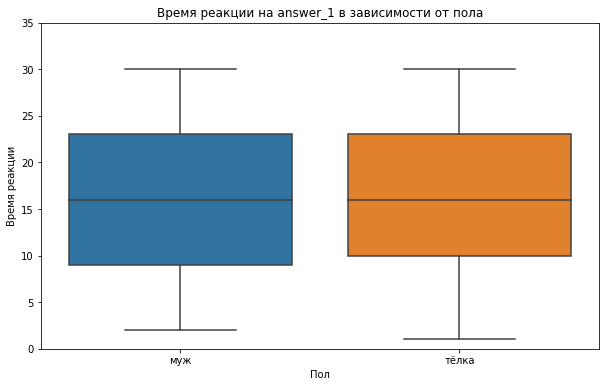

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="Reaction", data=df_g)
plt.ylim((0, 35))
plt.title('Время реакции на answer_1 в зависимости от пола')
plt.ylabel('Время реакции')
plt.xlabel('Пол');